In [1]:
import numpy as np

class DecisionStump():
    '''
    Decision stump is used as weak classifier, simply splits data into 2 parts .
    '''
    def __init__(self):
        self.polarity = 1 #Decide which part is classified as positiv or negativ.
        self.feature_idx = None #Choose the feature to split
        self.threshold = None #Find the threshhold to split
        self.alpha = None #Meassure the accuracy of the classifier


    def split(self, X):
        '''
        Function that splits the dataset based on thereshold of chosen feature and classifies them. 
        '''
        n_samples = X.shape[0]
        feature = X[:, self.feature_idx]
        predictions = np.ones(n_samples)
        if self.polarity == 1:
            #if polarity is 1, the left side is classified as negativ
            predictions[feature < self.threshold] = -1
        else:
            #if polarity is -1, the right side is classified as negativ
            predictions[feature > self.threshold] = -1

        return predictions


class Adaboost():
    '''
    Adaboost assembles a specific number of weak learners in order to make a stronger, preciser classification.
    Weak learners are sequentially created. The later will focus more on misclassifications of the former to be able to reclassify them.
    '''
    def __init__(self, n_clf=7, weak_learner = DecisionStump()):
        self.n_clf = n_clf #Number of weak learner
        self.weak_learner = weak_learner #Type of weak learner

    def fit(self, X, y):
        '''
        Function finding weak learners sequentially and returning them as a list.
        Default weak learner is DecisionStump.
        '''       
        n_samples, n_features = X.shape    
        w = np.full(n_samples, (1 / n_samples)) #Initialize weights to 1/N
        self.clfs = [] #List to store all splits
        
        #Iterate through classifiers
        for _ in range(self.n_clf):
            clf = self.weak_learner
            min_error = float('inf')
            
            # greedy search to find best threshold and feature
            for feature_i in range(n_features):
                feature = X[:, feature_i]
                thresholds = np.unique(feature)
                for threshold in thresholds:
                    p = 1
                    predictions = np.ones(n_samples)
                    predictions[feature < threshold] = -1  
                    #Calculate error = sum of weights of misclassified samples                    
                    misclassified = w[y != predictions]
                    error = sum(misclassified) 
                    if error > 0.5:
                        error = 1 - error
                        p = -1
                    #Store the best 
                    if error < min_error:
                        clf.polarity = p
                        clf.threshold = threshold
                        clf.feature_idx = feature_i
                        min_error = error

            #Calculate predictions and update weights
            clf.alpha = 0.5 * np.log((1.0 - min_error) / (min_error + 1e-10))
            predictions = clf.split(X)
            w *= np.exp(-clf.alpha * y * predictions)           
            w /= np.sum(w)  # Normalize to one

            # Save classifier
            self.clfs.append(clf)

    def predict(self, X):
        '''
        Function predicts classification based on split of all weak learner
        '''
        clf_preds = [clf.alpha * clf.split(X) for clf in self.clfs]
        y_pred = np.sum(clf_preds, axis=0)
        y_pred = np.sign(y_pred)

        return y_pred


In [8]:
from sklearn import datasets, model_selection

def accuracy(y_true, y_predict):
    accuracy = np.sum(y_true == y_predict) / len(y_true)
    return accuracy    
    
data = datasets.load_digits()
X = data.data
y = data.target

digit1 = 1
digit2 = 8
idx = np.append(np.where(y == digit1)[0], np.where(y == digit2)[0])
y = data.target[idx]
# Change labels to {-1, 1}
y[y == digit1] = -1
y[y == digit2] = 1
X = data.data[idx]

    
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state = 42)

# Adaboost classification with 5 weak classifiers
clf = Adaboost()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy(y_test, y_pred)
print ("Accuracy:", accuracy)

Accuracy: 0.7640449438202247


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

class DataVisualizer:
    def __init__(self, data: pd.DataFrame):
        """Initialize the DataVisualizer with a pandas DataFrame and optional labels."""
        self.data = data

    def basic_statistics(self):
        """Display basic statistics of the DataFrame."""
        return self.data.describe()

    def missing_values(self):
        """Show the count of missing values in each column."""
        return self.data.isnull().sum()

    def pca_2d(self):
        """Perform PCA on the numeric data and return the PCA results."""
        numeric_data = self.data.select_dtypes(include=[np.number])
        scaled_data = StandardScaler().fit_transform(numeric_data)
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(scaled_data)

        return pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

    def plot_2d(self, labels):
        """Plot data points colored by their true classification.""" 

        pca_df = self.pca_2d()
        pca_df['True Label'] = labels

        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='True Label', palette='viridis', alpha=0.7)
        plt.title('True Classification of Data Points')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend(title='True Label')
        plt.grid()
        plt.show()    





In [69]:
wtf.basic_statistics()

pixel_0_0   pixel_0_1   pixel_0_2   pixel_0_3   pixel_0_4   pixel_0_5  \
count      178.0  178.000000  178.000000  178.000000  178.000000  178.000000   
mean         0.0    0.078652    3.719101    9.971910   11.303371    6.421348   
std          0.0    0.375062    4.166015    5.197163    4.398008    5.374873   
min          0.0    0.000000    0.000000    0.000000    0.000000    0.000000   
25%          0.0    0.000000    0.000000    7.000000   10.000000    1.000000   
50%          0.0    0.000000    2.000000   12.000000   13.000000    6.000000   
75%          0.0    0.000000    5.000000   14.000000   14.000000   11.000000   
max          0.0    3.000000   16.000000   16.000000   16.000000   16.000000   

        pixel_0_6  pixel_0_7  pixel_1_0   pixel_1_1  ...   pixel_6_6  \
count  178.000000      178.0      178.0  178.000000  ...  178.000000   
mean     0.921348        0.0        0.0    1.005618  ...    2.325843   
std      1.890952        0.0        0.0    2.076223  ...    3.824616   
min      0.000000        0.0        0.0    0.000000  ...    0.000000   
25%      0.000000        0.0        0.0    0.000000  ...    0.000000   
50%      0.000000        0.0        0.0    0.000000  ...    0.000000   
75%      1.000000        0.0        0.0    1.000000  ...    4.000000   
max     11.000000        0.0        0.0   11.000000  ...   16.000000   

        pixel_6_7  pixel_7_0   pixel_7_1   pixel_7_2   pixel_7_3   pixel_7_4  \
count  178.000000      178.0  178.000000  178.000000  178.000000  178.000000   
mean     0.331461        0.0    0.095506    3.713483   10.533708   12.606742   
std      1.409098        0.0    0.347521    4.225553    5.366930    3.398630   
min      0.000000        0.0    0.000000    0.000000    0.000000    2.000000   
25%      0.000000        0.0    0.000000    0.000000    8.000000   11.000000   
50%      0.000000        0.0    0.000000    2.000000   12.000000   13.000000   
75%      0.000000        0.0    0.000000    6.000000   15.000000   16.000000   
max      9.000000        0.0    2.000000   16.000000   16.000000   16.000000   

        pixel_7_5   pixel_7_6   pixel_7_7  
count  178.000000  178.000000  178.000000  
mean     7.483146    2.207865    0.606742  
std      6.072281    4.511948    2.573740  
min      0.000000    0.000000    0.000000  
25%      1.000000    0.000000    0.000000  
50%      7.000000    0.000000    0.000000  
75%     13.000000    1.000000    0.000000  
max     16.000000   16.000000   16.000000  

[8 rows x 64 columns]

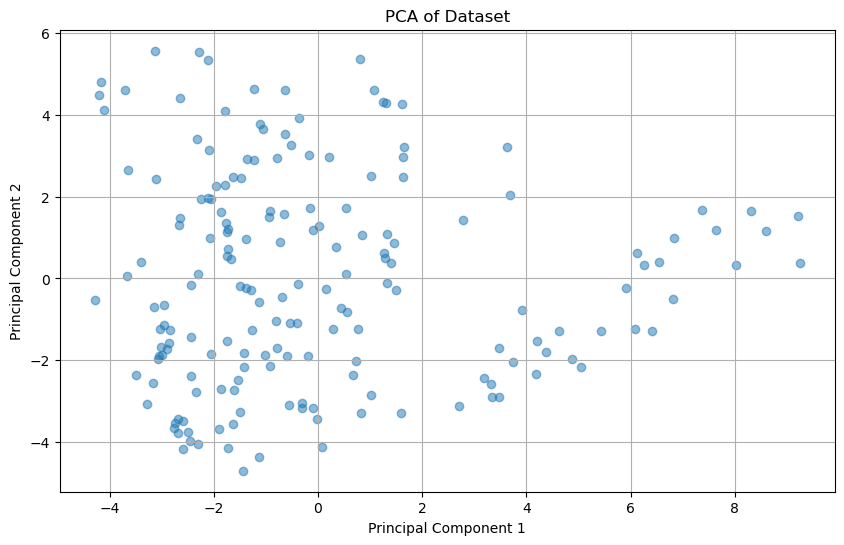

In [64]:
dcmm = pd.DataFrame(X_test, columns = data.feature_names)

wtf = DataVisualizer(dcmm)
wtf.plot_pca()

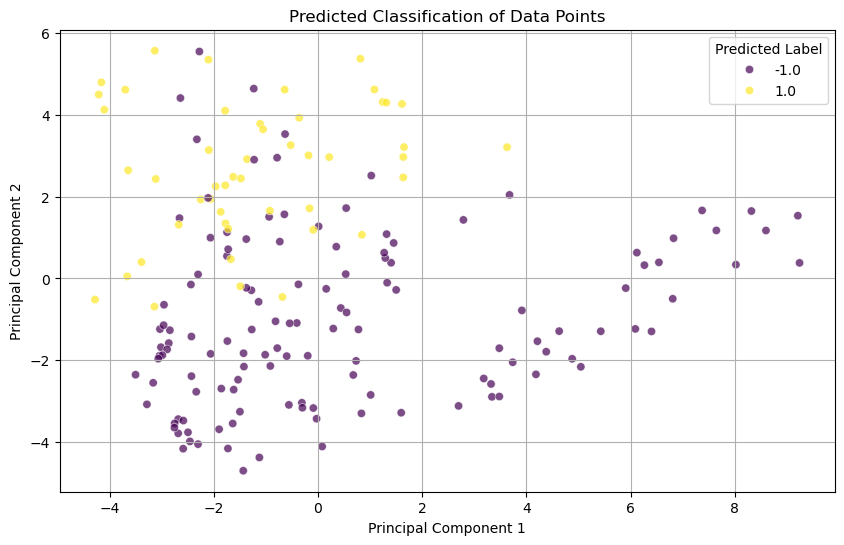

In [65]:
 wtf.plot_predicted_classification(y_pred)

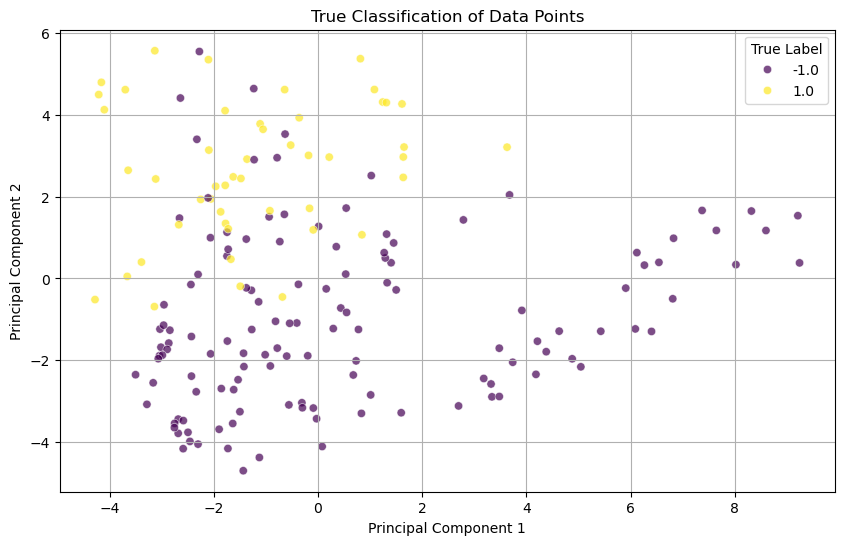

In [66]:
wtf.plot_2d(y_pred)

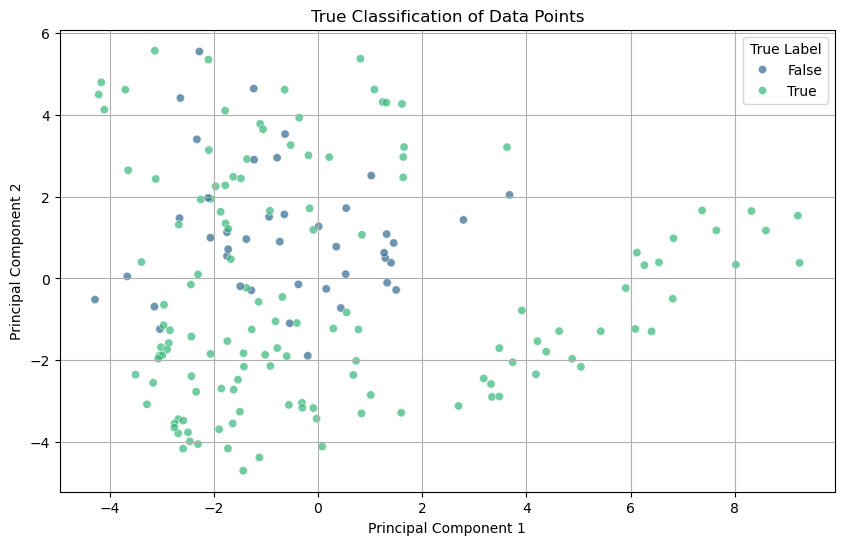

In [67]:
wtf.plot_2d(y_pred == y_test)